In [ ]:
!pip install tensorflow-text

     |████████████████████████████████| 4.9 MB 14.7 MB/s 
     |████████████████████████████████| 462 kB 70.5 MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving Data_test.xlsx to Data_test.xlsx


In [ ]:
import pandas as pd
df = pd.read_excel(io.BytesIO(uploaded['Data_test.xlsx']))
df.head(5)


,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I‚Äôm so lostHello, my name is Adam (16) and I...",suicide


In [ ]:
df['suicide']=df['class'].apply(lambda x: 1 if x=='suicide' else 0)
df.head()

,text,class,suicide
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
1,Am I weird I don't get affected by compliments...,non-suicide,0
2,Finally 2020 is almost over... So I can never ...,non-suicide,0
3,i need helpjust help me im crying so hard,suicide,1
4,"I‚Äôm so lostHello, my name is Adam (16) and I...",suicide,1


In [ ]:
###Drop Nan Values
df=df.dropna()

In [ ]:
X=df.drop('suicide',axis=1)

In [ ]:
## Get the Dependent features
y=df['suicide']

In [ ]:
X.shape
y.shape


(48910,)

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
### Vocabulary size
voc_size=5000

In [ ]:
messages=X.copy()

In [ ]:
messages['text'][1]
messages.reset_index(inplace=True)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z0-9]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
43910
43911
43912
43913
43914
43915
43916
43917
43918
43919
43920
43921
43922
43923
43924
43925
43926
43927
43928
43929
43930
43931
43932
43933
43934
43935
43936
43937
43938
43939
43940
43941
43942
43943
43944
43945
43946
43947
43948
43949
43950
43951
43952
43953
43954
43955
43956
43957
43958
43959
43960
43961
43962
43963
43964
43965
43966
43967
43968
43969
43970
43971
43972
43973
43974
43975
43976
43977
43978
43979
43980
43981
43982
43983
43984
43985
43986
43987
43988
43989
43990
43991
43992
43993
43994
43995
43996
43997
43998
43999
44000
44001
44002
44003
44004
44005
44006
44007
44008
44009
44010
44011
44012
44013
44014
44015
44016
44017
44018
44019
44020
44021
44022
44023
44024
44025
44026
44027
44028
44029
44030
44031
44032
44033
44034
44035
44036
44037
44038
44039
44040
44041
44042
44043
44044
44045
44046
44047
44048
44049
44050
44051
44052
44053
44054
44055
44056
44057
44058
44059
44060
44061
44062
44063
44064
44065
44066
44067
4

In [ ]:
corpus
df['updated_text']=corpus
#df=df.drop("text", axis=1, inplace=True)



In [ ]:
df_bkp=df

In [ ]:
df_bkp.drop("text", axis=1, inplace=True)

In [ ]:
df_bkp

,class,suicide,updated_text
0,suicide,1,ex wife threaten suiciderec left wife good che...
1,non-suicide,0,weird get affect compliment come someon know i...
2,non-suicide,0,final 2020 almost never hear 2020 bad year eve...
3,suicide,1,need helpjust help im cri hard
4,suicide,1,losthello name adam 16 struggl year afraid pas...
...,...,...,...
48905,suicide,1,contempl suicidei mid late 20 musician primari...
48906,suicide,1,realli live guess still alivemi mind undersand...
48907,suicide,1,againit matter 5 day 20 day 30 day done mani t...
48908,non-suicide,0,opinion need realli rake cold hard cah rel chr...


In [ ]:
df_bkp.rename(columns = {'updated_text':'text'}, inplace = True)

In [ ]:
df_bkp

,class,suicide,text
0,suicide,1,ex wife threaten suiciderec left wife good che...
1,non-suicide,0,weird get affect compliment come someon know i...
2,non-suicide,0,final 2020 almost never hear 2020 bad year eve...
3,suicide,1,need helpjust help im cri hard
4,suicide,1,losthello name adam 16 struggl year afraid pas...
...,...,...,...
48905,suicide,1,contempl suicidei mid late 20 musician primari...
48906,suicide,1,realli live guess still alivemi mind undersand...
48907,suicide,1,againit matter 5 day 20 day 30 day done mani t...
48908,non-suicide,0,opinion need realli rake cold hard cah rel chr...


In [ ]:
df_bkp1=df

In [ ]:
df=df_bkp

In [ ]:
df

,class,suicide,text
0,suicide,1,ex wife threaten suiciderec left wife good che...
1,non-suicide,0,weird get affect compliment come someon know i...
2,non-suicide,0,final 2020 almost never hear 2020 bad year eve...
3,suicide,1,need helpjust help im cri hard
4,suicide,1,losthello name adam 16 struggl year afraid pas...
...,...,...,...
48905,suicide,1,contempl suicidei mid late 20 musician primari...
48906,suicide,1,realli live guess still alivemi mind undersand...
48907,suicide,1,againit matter 5 day 20 day 30 day done mani t...
48908,non-suicide,0,opinion need realli rake cold hard cah rel chr...


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],df['suicide'], stratify=df['suicide'])
#X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=42)


In [ ]:
X_test.head(4)
#print(X_train)


4598     school today took good long look realli like s...
20375    messi realli day feel need kill past month thi...
1030     exhaust continu feel way bound get better past...
24627    believ addict feel good inc gorillaz song drug...
Name: text, dtype: object

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
text_input

<KerasTensor: shape=(None,) dtype=string (created by layer 'text')>

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1147/1147 [==============================] - 371s 313ms/step - loss: 0.4748 - accuracy: 0.7855
Epoch 2/10
1147/1147 [==============================] - 362s 316ms/step - loss: 0.4012 - accuracy: 0.8296
Epoch 3/10
1147/1147 [==============================] - 360s 314ms/step - loss: 0.3810 - accuracy: 0.8391
Epoch 4/10
1147/1147 [==============================] - 360s 314ms/step - loss: 0.3714 - accuracy: 0.8432
Epoch 5/10
1147/1147 [==============================] - 362s 316ms/step - loss: 0.3657 - accuracy: 0.8443
Epoch 6/10
1147/1147 [==============================] - 362s 315ms/step - loss: 0.3639 - accuracy: 0.8459
Epoch 7/10
1147/1147 [==============================] - 358s 312ms/step - loss: 0.3604 - accuracy: 0.8485
Epoch 8/10
1147/1147 [==============================] - 358s 312ms/step - loss: 0.3582 - accuracy: 0.8489
Epoch 9/10
1147/1147 [==============================] - 357s 312ms/step - loss: 0.3556 - accuracy: 0.8521
Epoch 10/10
1147/1147 [=======================

In [ ]:
model.evaluate(X_test, y_test)


383/383 [==============================] - 120s 310ms/step - loss: 0.3379 - accuracy: 0.8638


[0.33794230222702026, 0.8638371229171753]

In [ ]:
reviews = [
    'I am committing suicide',
    'I am tired of doing everything',
    'Finally 2020 is almost over... So I can never hear "2020 has been a bad year" ever again.',
    'I am happy',
    'I am killing myself',
    'I loveyou all. Bye everyone'
]
model.predict(reviews)

array([[0.39815426],
       [0.6198223 ],
       [0.35225987],
       [0.02732155],
       [0.6489823 ],
       [0.04197308]], dtype=float32)

In [ ]:
from sklearn import metrics
note_test=X_test.tolist()
type(note_test)
y_pred_initial=model.predict(note_test)
y_pred=[]

In [ ]:
for i in range(0,len(y_pred_initial)):
  if(y_pred_initial[i]<0.5):
    y_pred.append(0)
  else:
    y_pred.append(1)

In [ ]:
from sklearn import metrics
cm_BERT=metrics.confusion_matrix(y_test,y_pred)
print(cm_BERT)

[[5557  572]
 [1093 5006]]


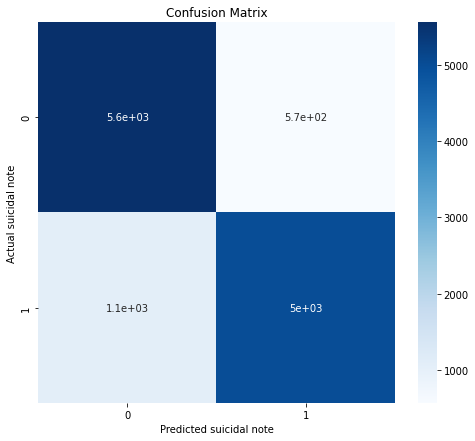

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Plotting the confusion matrix
plt.figure(figsize=(8,7))
sns.heatmap(cm_BERT, annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual suicidal note')
plt.xlabel('Predicted suicidal note')
plt.show()

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      6129
           1       0.90      0.82      0.86      6099

    accuracy                           0.86     12228
   macro avg       0.87      0.86      0.86     12228
weighted avg       0.87      0.86      0.86     12228



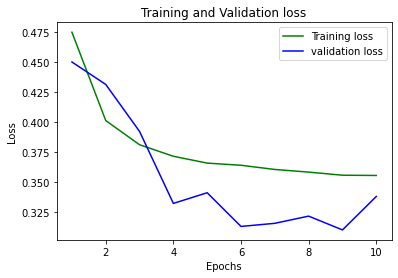

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

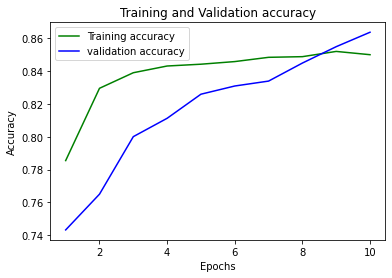

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()